In [142]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist

from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,6)
import pandas as pd
import numpy as np

import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization,Dropout
from tensorflow.keras import backend as K


import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Defining the right input shape

In [191]:
#reshaping X 
K.clear_session()

X_train = X_train.reshape((60000, 28, 28, 1))
X_test=X_test.reshape((10000, 28, 28, 1))
#scale the inputs to be in the range [0-1] rather than [0-255]

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [192]:
#one-hot format target
y_train = to_categorical(y_train, num_classes=10) 
y_test = to_categorical(y_test, num_classes=10)

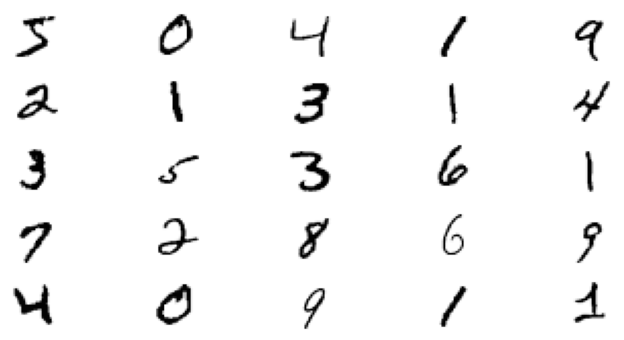

In [140]:
# Plot the first 25 digits
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

## Building model

In [193]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32,
                            padding='same',
                            activation ='relu',
                            kernel_size=(3,3),
                            input_shape=(28, 28, 1) # rows, cols, color channels
                            ))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


model.add(keras.layers.Conv2D(filters=64,
                            padding='same',
                            activation ='relu',
                            kernel_size=(3,3),
                            ))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))



model.add(keras.layers.Conv2D(filters=64,
                            padding='same',
                            activation ='relu',
                            kernel_size=(3,3),
                            ))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(10, activation='softmax'))





In [194]:
# view all layers and the number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

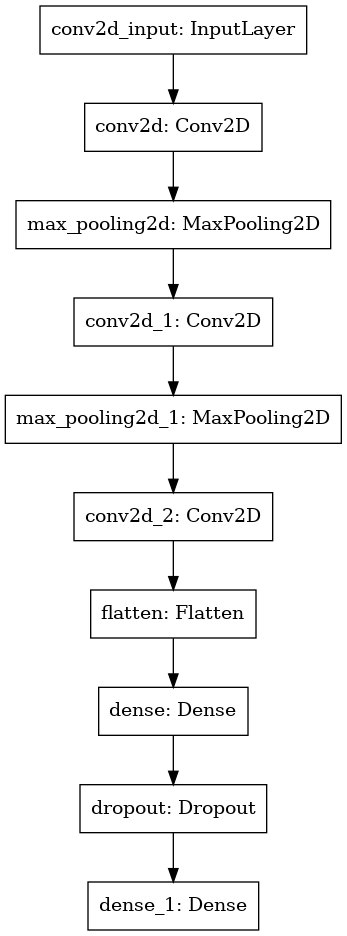

In [211]:
#from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(model,
   #to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

## Compiling and fitting model

In [196]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [197]:
results = model.fit(X_train, y_train, epochs=5, batch_size=200, validation_split=0.1)

Epoch 1/5
270/270 [==============================] - 118s 431ms/step - loss: 0.3238 - accuracy: 0.8972 - val_loss: 0.0617 - val_accuracy: 0.9825
Epoch 2/5
270/270 [==============================] - 112s 415ms/step - loss: 0.0857 - accuracy: 0.9749 - val_loss: 0.0512 - val_accuracy: 0.9855
Epoch 3/5
270/270 [==============================] - 109s 403ms/step - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.0408 - val_accuracy: 0.9873
Epoch 4/5
270/270 [==============================] - 106s 392ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0372 - val_accuracy: 0.9902
Epoch 5/5
270/270 [==============================] - 111s 411ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0311 - val_accuracy: 0.9922


## Model evaluation

In [198]:

train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 5s 15ms/step - loss: 0.0261 - accuracy: 0.9923
Train accuracy: 0.99525
Train loss: 0
Test accuracy: 0.9923
Test loss: 0.026


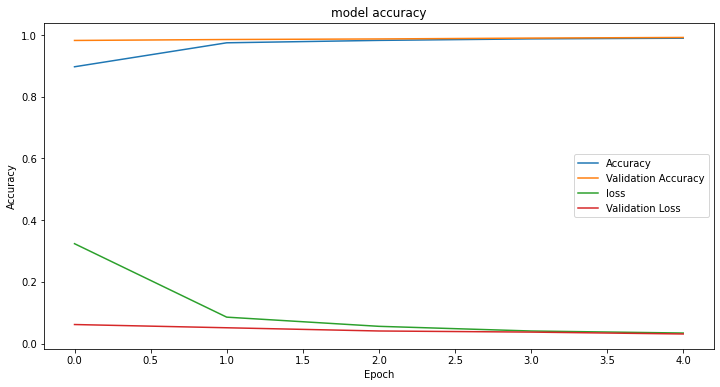

In [199]:
plt.plot(results.history["accuracy"])
plt.plot(results.history['val_accuracy'])
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

## Predictions

In [202]:
predicted_classes=model.predict_classes(X_test)
y_test=np.argmax(y_test,axis = 1)

In [203]:
predicted_classes[0],y_test[0]

(7, 7)

In [205]:
# Check which items we got right / wrong
correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]

In [206]:
len(np.nonzero(predicted_classes != y_test)[0]),len(np.nonzero(predicted_classes == y_test)[0])

(77, 9923)

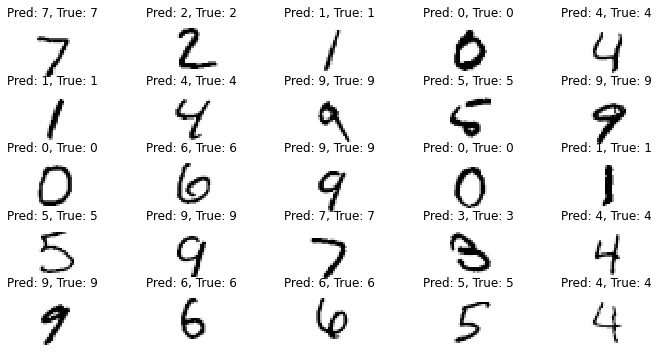

In [207]:
plt.figure()
for i, correct in enumerate(correct[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap=plt.cm.Greys, interpolation='none')
    plt.axis('off')
    plt.title("Pred: {}, True: {}".format(predicted_classes[correct], y_test[correct]))

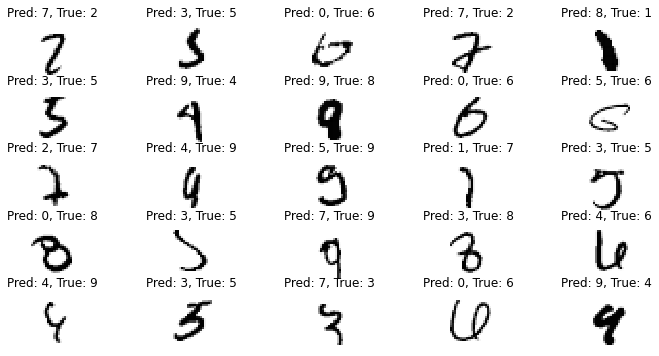

In [208]:
plt.figure()
for i, incorrect in enumerate(incorrect[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap=plt.cm.Greys, interpolation='none')
    plt.axis('off')
    plt.title("Pred: {}, True: {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted_classes)

array([[ 978,    0,    0,    0,    0,    0,    0,    2,    0,    0],
       [   0, 1131,    1,    2,    0,    0,    0,    0,    1,    0],
       [   1,    0, 1025,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    0, 1007,    0,    0,    0,    1,    1,    1],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   1,    0,    0,    8,    0,  880,    1,    0,    0,    2],
       [   6,    2,    0,    1,    3,    1,  945,    0,    0,    0],
       [   0,    2,    3,    1,    0,    0,    0, 1020,    1,    1],
       [   3,    0,    1,    2,    0,    1,    0,    0,  965,    2],
       [   0,    1,    0,    0,    5,    1,    0,    8,    0,  994]])

## Saving model

In [212]:
# serialize model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [213]:
from tensorflow.keras.models import load_model

# load, create and compile model

model = load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2